In [24]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [25]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000, 784)

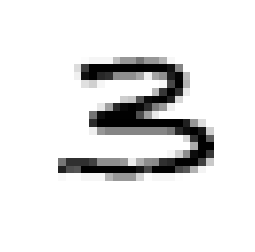

3.0

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy.random

random_digit = numpy.random.randint(10000, 50000)
some_digit = X[random_digit]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

y[random_digit]

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([False], dtype=bool)

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96265,  0.9529 ,  0.90425])

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[51718,  2861],
       [  743,  4678]])

In [42]:
from sklearn.metrics import precision_score, recall_score
mod_prec = precision_score(y_train_5, y_train_pred)
mod_rec = recall_score(y_train_5, y_train_pred)

print('Precision: {} (% correct prediction when positively predicting a 5)'.format(mod_prec))
print('Recall: {} (% of the actual 5\'s identified by the model)'.format(mod_rec))

from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)

print('F1: {} (harmonic mean of precision and recall)'.format(mod_prec))

Precision: 0.6205066985011275 (% correct prediction when positively predicting a 5)
Recall: 0.8629404168972514 (% of the actual 5's identified by the model)
F1: 0.6205066985011275 (harmonic mean of precision and recall)


[-120805.76120617]
[-399661.30015452  183803.84146308 -379889.0624817  ...,   52795.86712351
 -227491.59699321 -737972.54465961]


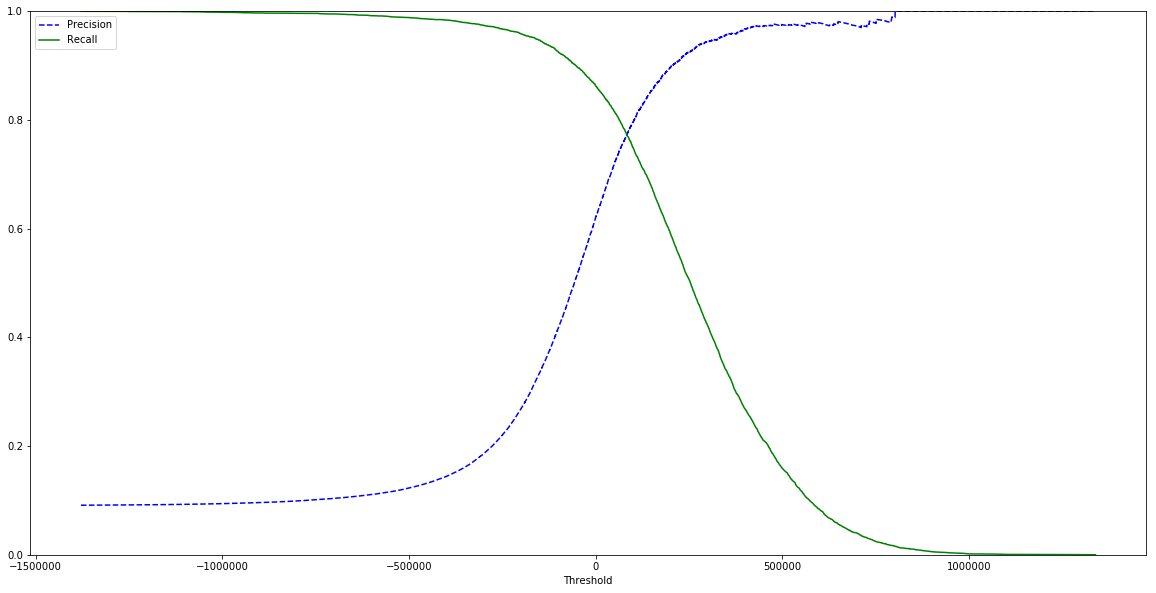

In [76]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.rcParams["figure.figsize"] = (2, 1)
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [84]:
y_train_pred_90 = (y_scores > 100000)

mod_prec = precision_score(y_train_5, y_train_pred_90)
mod_rec = recall_score(y_train_5, y_train_pred_90)

print('At 90% Precision:')
print('Precision: {} (% correct prediction when positively predicting a 5)'.format(mod_prec))
print('Recall: {} (% of the actual 5\'s identified by the model)'.format(mod_rec))

At 90% Precision:
Precision: 0.7960023515579071 (% correct prediction when positively predicting a 5)
Recall: 0.7493082457111234 (% of the actual 5's identified by the model)
